## Homework #4 - IS 445 - Ron Payne

Using traitlets and/or widgets build a notebook that:
* Allows the user to change the x and y fields on a scatter plot from the UFO dataset.  Here the "fields" are the names of the columns in the dataset.  (Do you want the user to be able to pick any 2 columns?  Or only certain columns?  Why or why not?). You must support the selection of at least 1 categorical column and at least 1 numerical column in for each of x and y.  Note: you don't have to support both axis having a categorical variable (unless you really want to!).

* Allows the user to pick their colormap.  In class we used the log of the duration in seconds as our color scaling, you can use this or something else (or if you *really* want to get fancy you can let the user decide by using a widget!)

Build a second widget that displays binned, aggregate values of a column where you can change:
* The field to "bin".  (Do you want the user to be able to pick any 2 columns?  Or only certain columns?  Why or why not?). You must support the selection of at least 1 categorical column and at least 1 numerical column.
* For numerical variables: The number of bins.

We'll start by loading in the libraries and funtions we'll be using:

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widget
import traitlets
from IPython.display import display

Next we'll read in the dataset file with some data cleanup:

In [62]:
ufos = pd.read_csv("\\Users\\rpayn\\Google Drive\\Personal\\Ron\\Masters\\PSM\\IS 445 - Fall 2020 Data Viz\\Week 05\\ufo-scrubbed-geocoded-time-standardized-00.csv",
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])

In [63]:
ufos = ufos.fillna({'country':'unknown', 'state':'unknown', 'shape':'unknown'})

In [64]:
ufos.columns

Index(['date', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'duration', 'comment', 'report_date', 'latitude', 'longitude'],
      dtype='object')

In [65]:
ufos.head()

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,unknown,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),unknown,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


I chose to limit the selectable columns based on the content of the data, for example, duration and comments don't make sense to graph. Comments will be different for each row and the duration is a mixed unit (e.g. seconds, minutes, hours), especially when there is a column with the same duration information in a single measure (seconds).

Output()

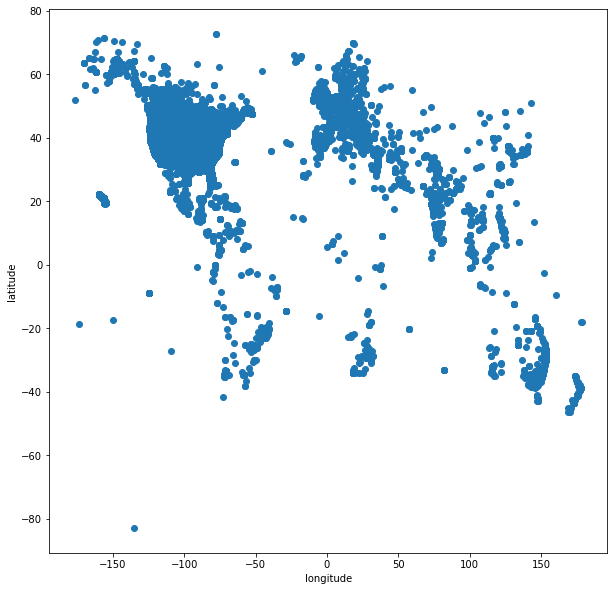

In [66]:
myx = widget.Dropdown(description='X-axis:', options=['date', 'country', 'shape', 'duration_seconds', 'latitude', 'longitude'])
myy = widget.Dropdown(description='Y-axis:', options=['date', 'country', 'shape', 'duration_seconds', 'latitude', 'longitude'])
plot_button = widget.Button(description='Plot It!')
output = widget.Output()

hbox = widget.HBox([myx, myy, plot_button])
display(hbox, output)

def make_plot(a):    
    with output:
        plt.figure(figsize=(10, 10))
        plt.scatter(ufos[myx.value],ufos[myy.value])
        plt.xlabel(myx.value)
        plt.ylabel(myy.value)
    plt.show()
plot_button.on_click(make_plot)


I can't figure out how to clear the figure when the "Plot it!" button is clicked a second time. plt.clf() and plt.close() doesn't work. Figure sizing doesn't work either. VERY FRUSTRATING!

Let's see if we can get the dynamic dropdown to work for the figure platted.

In [67]:
myx = widget.Dropdown(description='X-axis:', options=['date', 'country', 'shape', 'duration_seconds', 'latitude', 'longitude'])
myy = widget.Dropdown(description='Y-axis:', options=['date', 'country', 'shape', 'duration_seconds', 'latitude', 'longitude'])
plot_button = widget.Button(description='Plot It!')
output = widget.Output()

hbox = widget.HBox([myx, myy, plot_button])
display(hbox, output)

widget.interact(style=plt.style.available)
def make_plot(style):
    with plt.style.context(style):        
        with output:
            plt.figure(figsize=(10, 10))
            plt.scatter(ufos[myx.value],ufos[myy.value])
            plt.xlabel(myx.value)
            plt.ylabel(myy.value)
    plt.show()
plot_button.on_click(make_plot)

Output()

Nope. I definately do not have the hang of matplotlib or ipywidgets, and the online documentation is not understandable. VERY FRUSTRATING!

Moving on to the second widget

Build a second widget that displays binned, aggregate values of a column where you can change:

The field to "bin". (Do you want the user to be able to pick any 2 columns? Or only certain columns? Why or why not?). You must support the selection of at least 1 categorical column and at least 1 numerical column.
For numerical variables: The number of bins.

I'm not sure I understand the "binned, aggregate values" component and I ran out of time to get clarification so I am approaching it in 3 different ways.

First by using groups and coloring by group:

Output()

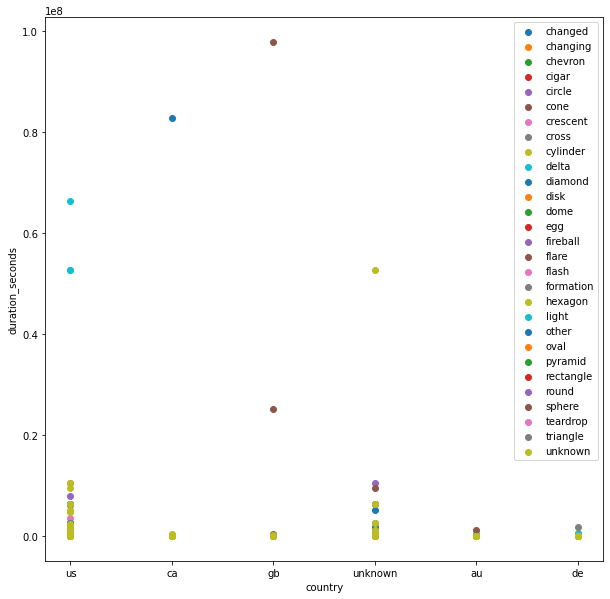

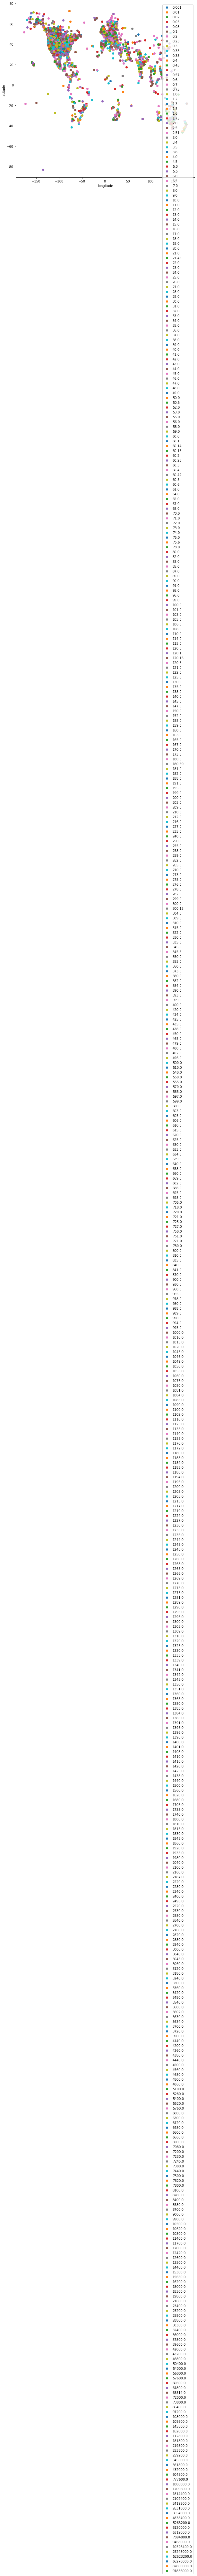

In [75]:
myx = widget.Dropdown(description='X-axis:', options=['date', 'country', 'shape', 'duration_seconds', 'latitude', 'longitude'])
myy = widget.Dropdown(description='Y-axis:', options=['date', 'country', 'shape', 'duration_seconds', 'latitude', 'longitude'])
mybin = widget.Dropdown(description='Color by:', options=['shape', 'duration_seconds'])
plot_button = widget.Button(description='Plot It!')
output = widget.Output()

hbox = widget.HBox([myx, myy, mybin, plot_button])
display(hbox, output)

def make_plot(a):    
    with output:
        plt.figure(figsize=(10, 10))
        groups = ufos.groupby(mybin.value)
        for name, group in groups:
            plt.scatter(group[myx.value], group[myy.value], label=name)
        plt.xlabel(myx.value)
        plt.ylabel(myy.value)
        plt.legend()
    plt.show()
plot_button.on_click(make_plot)

Then by creating a set of sitigrams for the chosen column to be binned:

Output()

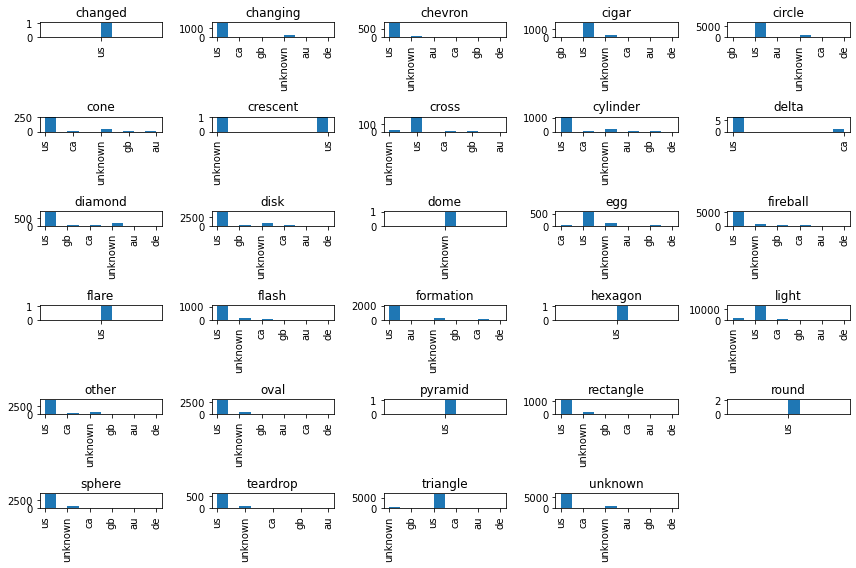

In [81]:
choice = widget.Dropdown(description='Plot', options=['date', 'country', 'latitude', 'longitude'])
group = widget.Dropdown(description='By Group:', options=['shape', 'duration_seconds'])
plot_button = widget.Button(description='Plot It!')
output = widget.Output()

hbox = widget.HBox([choice, group, plot_button])
display(hbox, output)

def make_plot(a):    
    with output:
        ufos.hist(column = choice.value, by = group.value, figsize = (12,8))
        plt.tight_layout()
plot_button.on_click(make_plot)



Here is a slider that sets the number of bins and redraws the histograms.

In [92]:
def plot(bins):
    ufos.hist(bins = bins, figsize = (12,8))
 
widget.interact(plot, bins=(2,20))

interactive(children=(IntSlider(value=11, description='bins', max=20, min=2), Output()), _dom_classes=('widget…

<function __main__.plot(bins)>